In [1]:
from sympy import *

import numpy as np
init_printing()

l1, l2, t = symbols('l1 l2 t', positive=True, real=True)
d3 = Function('d3')(t)
t1 = Function('theta_1')(t)
t2 = Function('theta_2')(t)

# Kinematyka prosta

In [2]:
A01 = trigsimp(Matrix([[-sin(t1), -cos(t1), 0, 0], [cos(t1), -sin(t1), 0, 0], [0, 0, 1, l1], [0, 0, 0, 1]]) * Matrix([[1, 0, 0, 0], [0, 0, -1, 0], [0, 1, 0, 0], [0, 0, 0, 1]]))
A01

⎡-sin(θ₁(t))  0  cos(θ₁(t))  0 ⎤
⎢                              ⎥
⎢cos(θ₁(t))   0  sin(θ₁(t))  0 ⎥
⎢                              ⎥
⎢     0       1      0       l₁⎥
⎢                              ⎥
⎣     0       0      0       1 ⎦

In [3]:
A02 = trigsimp(A01 * Matrix([[cos(t2), -sin(t2), 0, 0], [sin(t2), cos(t2), 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]]) * Matrix([[1, 0, 0, l2], [0, 0, -1, 0], [0, 1, 0, 0], [0, 0, 0, 1]]))
A02

⎡-sin(θ₁(t))⋅cos(θ₂(t))  cos(θ₁(t))  -sin(θ₁(t))⋅sin(θ₂(t))  -l₂⋅sin(θ₁(t))⋅co
⎢                                                                             
⎢cos(θ₁(t))⋅cos(θ₂(t))   sin(θ₁(t))  sin(θ₂(t))⋅cos(θ₁(t))   l₂⋅cos(θ₁(t))⋅cos
⎢                                                                             
⎢      sin(θ₂(t))            0            -cos(θ₂(t))           l₁ + l₂⋅sin(θ₂
⎢                                                                             
⎣          0                 0                 0                         1    

s(θ₂(t))⎤
        ⎥
(θ₂(t)) ⎥
        ⎥
(t))    ⎥
        ⎥
        ⎦

In [4]:
A03 = trigsimp(A02 * Matrix([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, d3], [0, 0, 0, 1]]))
A03

⎡-sin(θ₁(t))⋅cos(θ₂(t))  cos(θ₁(t))  -sin(θ₁(t))⋅sin(θ₂(t))  -(l₂⋅cos(θ₂(t)) +
⎢                                                                             
⎢cos(θ₁(t))⋅cos(θ₂(t))   sin(θ₁(t))  sin(θ₂(t))⋅cos(θ₁(t))   (l₂⋅cos(θ₂(t)) + 
⎢                                                                             
⎢      sin(θ₂(t))            0            -cos(θ₂(t))            l₁ + l₂⋅sin(θ
⎢                                                                             
⎣          0                 0                 0                              

 d₃(t)⋅sin(θ₂(t)))⋅sin(θ₁(t))⎤
                             ⎥
d₃(t)⋅sin(θ₂(t)))⋅cos(θ₁(t)) ⎥
                             ⎥
₂(t)) - d₃(t)⋅cos(θ₂(t))     ⎥
                             ⎥
     1                       ⎦

# Kinematyka prędkości

In [5]:
T = A03[0:3, 3]
Jv = trigsimp(Matrix([[diff(T[0], t1), diff(T[0], t2), diff(T[0], d3)],
                        [diff(T[1], t1), diff(T[1], t2), diff(T[1], d3)],
                        [diff(T[2], t1), diff(T[2], t2), diff(T[2], d3)]]))
Jv

⎡-(l₂⋅cos(θ₂(t)) + d₃(t)⋅sin(θ₂(t)))⋅cos(θ₁(t))  (l₂⋅sin(θ₂(t)) - d₃(t)⋅cos(θ₂
⎢                                                                             
⎢-(l₂⋅cos(θ₂(t)) + d₃(t)⋅sin(θ₂(t)))⋅sin(θ₁(t))  (-l₂⋅sin(θ₂(t)) + d₃(t)⋅cos(θ
⎢                                                                             
⎣                      0                                l₂⋅cos(θ₂(t)) + d₃(t)⋅

(t)))⋅sin(θ₁(t))   -sin(θ₁(t))⋅sin(θ₂(t))⎤
                                         ⎥
₂(t)))⋅cos(θ₁(t))  sin(θ₂(t))⋅cos(θ₁(t)) ⎥
                                         ⎥
sin(θ₂(t))              -cos(θ₂(t))      ⎦

In [6]:
R = A03[0:3, 0:3]
Rp = trigsimp(diff(R,t))
tensor = trigsimp(Rp * R.T)
tensor

⎡                             d                          d         ⎤
⎢          0                 -──(θ₁(t))       sin(θ₁(t))⋅──(θ₂(t)) ⎥
⎢                             dt                         dt        ⎥
⎢                                                                  ⎥
⎢      d                                                  d        ⎥
⎢      ──(θ₁(t))                 0            -cos(θ₁(t))⋅──(θ₂(t))⎥
⎢      dt                                                 dt       ⎥
⎢                                                                  ⎥
⎢            d                     d                               ⎥
⎢-sin(θ₁(t))⋅──(θ₂(t))  cos(θ₁(t))⋅──(θ₂(t))            0          ⎥
⎣            dt                    dt                              ⎦

In [7]:
omegax = tensor[2, 1]
omegay = tensor[0, 2]
omegaz = tensor[1, 0]

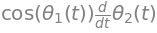

In [8]:
omegax

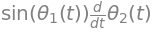

In [9]:
omegay

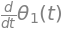

In [10]:
omegaz

# Dynamika

In [11]:
oc1 = Matrix([[0], [0], [l1/2]])
oc1

⎡0 ⎤
⎢  ⎥
⎢0 ⎥
⎢  ⎥
⎢l₁⎥
⎢──⎥
⎣2 ⎦

In [12]:
oc2 = Matrix(A02[0:3,3].subs(l2,l2/2))
oc2

⎡-l₂⋅sin(θ₁(t))⋅cos(θ₂(t)) ⎤
⎢──────────────────────────⎥
⎢            2             ⎥
⎢                          ⎥
⎢ l₂⋅cos(θ₁(t))⋅cos(θ₂(t)) ⎥
⎢ ──────────────────────── ⎥
⎢            2             ⎥
⎢                          ⎥
⎢         l₂⋅sin(θ₂(t))    ⎥
⎢    l₁ + ─────────────    ⎥
⎣               2          ⎦

In [13]:
oc3 = Matrix(A03[0:3,3].subs(d3,d3/2))
oc3

⎡ ⎛                d₃(t)⋅sin(θ₂(t))⎞           ⎤
⎢-⎜l₂⋅cos(θ₂(t)) + ────────────────⎟⋅sin(θ₁(t))⎥
⎢ ⎝                       2        ⎠           ⎥
⎢                                              ⎥
⎢⎛                d₃(t)⋅sin(θ₂(t))⎞            ⎥
⎢⎜l₂⋅cos(θ₂(t)) + ────────────────⎟⋅cos(θ₁(t)) ⎥
⎢⎝                       2        ⎠            ⎥
⎢                                              ⎥
⎢                         d₃(t)⋅cos(θ₂(t))     ⎥
⎢    l₁ + l₂⋅sin(θ₂(t)) - ────────────────     ⎥
⎣                                2             ⎦

In [14]:
cross = Matrix([[0], [0], [1]]).cross(oc1)
Joc1 = Matrix([[cross[0], 0, 0], [cross[1], 0, 0], [cross[2], 0, 0], [0,0,0], [0,0,0], [1,0,0]])
Joc1

⎡0  0  0⎤
⎢       ⎥
⎢0  0  0⎥
⎢       ⎥
⎢0  0  0⎥
⎢       ⎥
⎢0  0  0⎥
⎢       ⎥
⎢0  0  0⎥
⎢       ⎥
⎣1  0  0⎦

In [15]:
z1 = A01[0:3,2]
cross0 = Matrix([[0], [0], [1]]).cross(oc2)
cross1 = trigsimp(z1.cross(oc2-A01[0:3, 3]))
Joc2 = Matrix([[cross0[0], cross1[0], 0],
               [cross0[1], cross1[1], 0], 
               [cross0[2], cross1[2], 0], 
               [0, z1[0], 0], 
               [0, z1[1], 0], 
               [1, z1[2], 0]])
Joc2

⎡-l₂⋅cos(θ₁(t))⋅cos(θ₂(t))    l₂⋅sin(θ₁(t))⋅sin(θ₂(t))    ⎤
⎢──────────────────────────   ────────────────────────   0⎥
⎢            2                           2                ⎥
⎢                                                         ⎥
⎢-l₂⋅sin(θ₁(t))⋅cos(θ₂(t))   -l₂⋅sin(θ₂(t))⋅cos(θ₁(t))    ⎥
⎢──────────────────────────  ──────────────────────────  0⎥
⎢            2                           2                ⎥
⎢                                                         ⎥
⎢                                  l₂⋅cos(θ₂(t))          ⎥
⎢            0                     ─────────────         0⎥
⎢                                        2                ⎥
⎢                                                         ⎥
⎢            0                       cos(θ₁(t))          0⎥
⎢                                                         ⎥
⎢            0                       sin(θ₁(t))          0⎥
⎢                                                         ⎥
⎣            1                          

In [16]:
z2 = A02[0:3,2]
cross0 = Matrix([[0], [0], [1]]).cross(oc3)
cross1 = trigsimp(z2.cross(oc3-A01[0:3, 3]))
Joc3 = Matrix([[cross0[0], cross1[0], z2[0]/2],
               [cross0[1], cross1[1], z2[1]/2], 
               [cross0[2], cross1[2], z2[2]/2], 
               [0, z1[0], 0], 
               [0, z1[1], 0], 
               [1, z1[2], 0]])
Joc3

⎡ ⎛                d₃(t)⋅sin(θ₂(t))⎞                            -sin(θ₁(t))⋅si
⎢-⎜l₂⋅cos(θ₂(t)) + ────────────────⎟⋅cos(θ₁(t))  l₂⋅cos(θ₁(t))  ──────────────
⎢ ⎝                       2        ⎠                                       2  
⎢                                                                             
⎢ ⎛                d₃(t)⋅sin(θ₂(t))⎞                             sin(θ₂(t))⋅co
⎢-⎜l₂⋅cos(θ₂(t)) + ────────────────⎟⋅sin(θ₁(t))  l₂⋅sin(θ₁(t))   ─────────────
⎢ ⎝                       2        ⎠                                       2  
⎢                                                                             
⎢                                                                    -cos(θ₂(t
⎢                      0                               0             ─────────
⎢                                                                         2   
⎢                                                                             
⎢                      0                          co

# Macierz bezwładności

In [17]:
m1, m2, m3, Ixx1, Iyy1, Izz1, Ixx2, Iyy2, Izz2, Ixx3, Iyy3, Izz3 = symbols('m1 m2 m3 Ixx1 Iyy1 Izz1 Ixx2 Iyy2 Izz2 Ixx3 Iyy3 Izz3')

In [18]:
D1 = trigsimp(Joc1[0:3, :].T * Joc1[0:3, :] * m1 + Joc1[3:6, :].T * A01[0:3, 0:3] * Matrix([[Ixx1, 0, 0], [0, Iyy1, 0], [0, 0, Izz1]]) * A01[0:3, 0:3].T * Joc1[3:6, :])
D1

⎡Iyy₁  0  0⎤
⎢          ⎥
⎢ 0    0  0⎥
⎢          ⎥
⎣ 0    0  0⎦

In [19]:
D2 = trigsimp(Joc2[0:3, :].T * Joc2[0:3, :] * m2 + Joc2[3:6, :].T * A02[0:3, 0:3] * Matrix([[Ixx2, 0, 0], [0, Iyy2, 0], [0, 0, Izz2]]) * A02[0:3, 0:3].T * Joc2[3:6, :])
D2

⎡                                        2       2                         ⎤
⎢        2                  2          l₂ ⋅m₂⋅cos (θ₂(t))                  ⎥
⎢Ixx₂⋅sin (θ₂(t)) + Izz₂⋅cos (θ₂(t)) + ──────────────────        0        0⎥
⎢                                              4                           ⎥
⎢                                                                          ⎥
⎢                                                                   2      ⎥
⎢                                                                 l₂ ⋅m₂   ⎥
⎢                           0                              Iyy₂ + ──────  0⎥
⎢                                                                   4      ⎥
⎢                                                                          ⎥
⎣                           0                                    0        0⎦

In [20]:
D3 = trigsimp(Joc3[0:3, :].T * Joc3[0:3, :] * m3 + Joc3[3:6, :].T * A03[0:3, 0:3] * Matrix([[Ixx3, 0, 0], [0, Iyy3, 0], [0, 0, Izz3]]) * A03[0:3, 0:3].T * Joc3[3:6, :])
D3

⎡                                                                             
⎢        2                  2          m₃⋅(2⋅l₂⋅cos(θ₂(t)) + d₃(t)⋅sin(θ₂(t)))
⎢Ixx₃⋅sin (θ₂(t)) + Izz₃⋅cos (θ₂(t)) + ───────────────────────────────────────
⎢                                                         4                   
⎢                                                                             
⎢                         ⎛                d₃(t)⋅sin(θ₂(t))⎞                  
⎢                  -l₂⋅m₃⋅⎜l₂⋅cos(θ₂(t)) + ────────────────⎟                  
⎢                         ⎝                       2        ⎠                  
⎢                                                                             
⎢                                                                             
⎢                                      0                                      
⎣                                                                             

2                                               ⎤
 

In [21]:
D = simplify(D1 + D2 + D3)
D

⎡                                                                             
⎢        2                  2                         2                  2    
⎢Ixx₂⋅sin (θ₂(t)) + Ixx₃⋅sin (θ₂(t)) + Iyy₁ + Izz₂⋅cos (θ₂(t)) + Izz₃⋅cos (θ₂(
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                  -l₂⋅m₃⋅(2⋅l₂⋅cos(θ₂(t)) + d
⎢                                                  ───────────────────────────
⎢                                                                       2     
⎢                                                                             
⎢                                                                             
⎢                                                                       0     
⎣                                                   

# Macierz Coriolisa

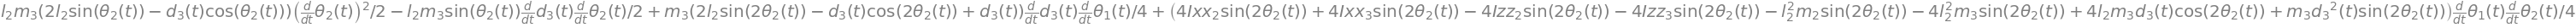

In [22]:
#c111 = (D[0, 0].diff(t1) + D[0, 0].diff(t1) - D[0, 0].diff(t1))/2
c121 = (D[0,0].diff(t2))/2
c221 = (D[1,0].diff(t2) + D[1,0].diff(t2))/2
c211 = (D[0,0].diff(t2))/2
c131 = (D[0, 0].diff(d3))/2
#c331 = (D[2,0].diff(d3) + D[2,0].diff(d3))/2
c311 = (D[0, 0].diff(d3))/2
c231 = (D[1,0].diff(d3))/2
c321 = (D[1,0].diff(d3))/2
c1 = simplify(trigsimp(c121 * diff(t1,t) * diff(t2,t) + c221 * diff(t2,t) * diff(t2,t) + c211 * diff(t1,t) * diff(t2,t) + c131 * diff(d3,t) * diff(t1,t) + c311 * diff(t1,t) * diff(d3,t) + c231 * diff(t2,t) * diff(d3,t) + c321 * diff(t2,t) * diff(d3,t)))
c1

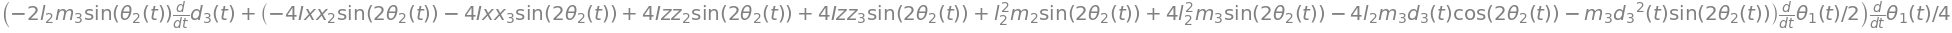

In [23]:
c112 = (-D[0, 0].diff(t2))/2
c122 = (D[0, 1].diff(t2) - D[0, 1].diff(t2))/2
#c222 = (D[1, 1].diff(t2) + D[1, 1].diff(t2) - D[1, 1].diff(t2))/2
c212 = (D[0, 1].diff(t2) - D[1, 0].diff(t2))/2
c132 = (D[0, 1].diff(d3))/2
#c332 = (D[2, 1].diff(d3) + D[2, 1].diff(d3) - D[2, 2].diff(t2))/2
c312 = (D[0, 1].diff(d3))/2
#c232 = (D[2, 1].diff(t2) + D[1, 1].diff(d3) - D[1, 2].diff(t2))/2
#c322 = (D[1, 1].diff(d3) + D[2, 1].diff(t2) - D[2, 1].diff(t2))/2
c2 = simplify(c112 * diff(t1,t) * diff(t1,t) + c122 * diff(t2,t) * diff(t1,t) + c212 * diff(t1,t) * diff(t2,t) + c132 * diff(t1,t)  * diff(d3,t) + c312 * diff(t1,t)  * diff(d3,t))
c2

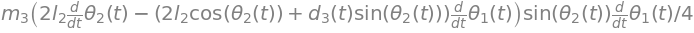

In [24]:
c113 = (- D[0, 0].diff(d3))/2
c123 = (- D[0, 1].diff(d3))/2
#c223 = (D[1, 2].diff(t2) + D[1, 2].diff(t2) - D[1, 1].diff(d3))/2
c213 = (- D[1, 0].diff(d3))/2
#c133 = (D[0, 2].diff(d3) - D[0, 2].diff(d3))/2
#c333
#c313 = (D[0, 2].diff(d3) - D[2, 0].diff(d3))/2
#c233 = (D[2, 2].diff(t2) + D[1, 2].diff(d3) - D[1, 2].diff(d3))/2
#c323 = (D[1, 2].diff(d3) + D[2, 2].diff(t2) - D[2, 1].diff(d3))/2
c3 = simplify(c113 * diff(t1,t) * diff(t1,t) + c123 * diff(t1,t) * diff(t2,t) + c213 * diff(t2,t) * diff(t1,t))
c3

In [25]:
C = trigsimp(Matrix([[c1], [c2], [c3]]))
C

⎡                                                      2                      
⎢                                           ⎛d        ⎞                     d 
⎢l₂⋅m₃⋅(2⋅l₂⋅sin(θ₂(t)) - d₃(t)⋅cos(θ₂(t)))⋅⎜──(θ₂(t))⎟    l₂⋅m₃⋅sin(θ₂(t))⋅──
⎢                                           ⎝dt       ⎠                     dt
⎢─────────────────────────────────────────────────────── - ───────────────────
⎢                           2                                               2 
⎢                                                                             
⎢                                                                   ⎛         
⎢                                                                   ⎜         
⎢                                                                   ⎜         
⎢                                                                   ⎜- 2⋅l₂⋅m₃
⎢                                                                   ⎝         
⎢                                                   

In [26]:
g = symbols('g')
Ep = m1*g*oc1[2] + m2*g*oc2[2] + m3*g*oc3[2]
Ep

In [27]:
G = Matrix([[Ep.diff(t1)], [Ep.diff(t2)], [Ep.diff(d3)]])
G

⎡                             0                              ⎤
⎢                                                            ⎥
⎢g⋅l₂⋅m₂⋅cos(θ₂(t))        ⎛                d₃(t)⋅sin(θ₂(t))⎞⎥
⎢────────────────── + g⋅m₃⋅⎜l₂⋅cos(θ₂(t)) + ────────────────⎟⎥
⎢        2                 ⎝                       2        ⎠⎥
⎢                                                            ⎥
⎢                     -g⋅m₃⋅cos(θ₂(t))                       ⎥
⎢                     ─────────────────                      ⎥
⎣                             2                              ⎦